# NLP Assignment 1 (40% of grade): Sentiment Analysis from Tweets

This coursework will involve you implementing functions for a text classifier, which you will train to identify the **sentiment expressed in a text** in a dataset of approx. 27,000 entries, which will be split into a 80%/20% training/test split. 

In this template you are given the basis for that implementation, though some of the functions are missing, which you have to fill in.

Follow the instructions file **NLP_Assignment_1_Instructions.pdf** for details of each question - the outline of what needs to be achieved for each question is as below.

You must submit all **ipython notebooks and extra resources you need to run the code if you've added them** in the code submission, and a **2 page report (pdf)** in the report submission on QMPlus where you report your methods and findings according to the instructions file for each question.

In [1]:
import csv # csv reader
import nltk
from sklearn.svm import LinearSVC
from nltk.classify import SklearnClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_recall_fscore_support, accuracy_score # to report on precision and recall
import numpy as np

In [2]:
def load_data(path):
    """Load data from a tab-separated file and append it to raw_data."""
    with open(path) as f:
        reader = csv.reader(f, delimiter='\t')
        for line in reader:
            if line[0] == "Id":  # skip header
                continue
            (label, text) = parse_data_line(line)
            raw_data.append((text, label))

def split_and_preprocess_data(percentage):
    """Split the data between train_data and test_data according to the percentage
    and performs the preprocessing."""
    num_samples = len(raw_data)
    num_training_samples = int((percentage * num_samples))
    for (text, label) in raw_data[:num_training_samples]:
        train_data.append((to_feature_vector(pre_process(text)),label))
    for (text, label) in raw_data[num_training_samples:]:
        test_data.append((to_feature_vector(pre_process(text)),label))

# Question 1: Input and Basic preprocessing (10 marks)

In [3]:
def parse_data_line(data_line):
    # Should return a tuple of the label as just positive or negative and the statement
    # e.g. (label, statement)
    return (data_line[1], data_line[2])

In [4]:

# Input: a string of one statement
def pre_process(text, order=1):
    # Should return a list of tokens
    # DESCRIBE YOUR METHOD IN WORDS
    # return [w for w in nltk.word_tokenize(text)] <-- alternative
    tokens = text.split()
    tokens = ['<s>'] * (order-1) + tokens + ['</s>']
    return tokens

# Question 2: Basic Feature Extraction (20 marks)

In [5]:
global_feature_dict = {} # A global dictionary of features

def to_feature_vector(tokens):
    # Should return a dictionary containing features as keys, and weights as values
    # DESCRIBE YOUR METHOD IN WORDS
    return {t: tokens.count(t) for t in tokens}

In [6]:
raw_data = []
load_data('sentiment-dataset.tsv')
my_tokens = pre_process(raw_data[1][0])
print(my_tokens)
to_feature_vector(my_tokens)

['@AngryRaiderFan', 'I', 'know.', 'This,', 'TPP,', 'expanded', 'wars', 'and', 'drone', 'strikes,', 'mass', 'surveillance,', 'on', 'and', 'on...', '</s>']


{'@AngryRaiderFan': 1,
 'I': 1,
 'know.': 1,
 'This,': 1,
 'TPP,': 1,
 'expanded': 1,
 'wars': 1,
 'and': 2,
 'drone': 1,
 'strikes,': 1,
 'mass': 1,
 'surveillance,': 1,
 'on': 1,
 'on...': 1,
 '</s>': 1}

In [7]:
# TRAINING AND VALIDATING OUR CLASSIFIER

def train_classifier(data):
    print("Training Classifier...")
    pipeline =  Pipeline([('svc', LinearSVC())])
    return SklearnClassifier(pipeline).train(data)

# Question 3: Cross-validation (20 marks)

In [8]:
#solution
from sklearn.metrics import classification_report


def cross_validate(dataset, folds):
    cv_results = np.array([0,0,0,0])
    fold_results = []
    fold_size = int(len(dataset)/folds) + 1
    
    for i in range(0,len(dataset),int(fold_size)):
        # insert code here that trains and tests on the 10 folds of data in the dataset
        print("Fold start on items %d - %d" % (i, i+fold_size))
        # FILL IN THE METHOD HERE
        train = dataset[:i] + dataset[i+fold_size:]
        test = dataset[i:i+fold_size]
        
        true_vals = [t[1] for t in test]
        
        clf = train_classifier(train)
        preds = predict_labels([x[0] for x in test], clf)
        
        prec, rec, f, _ = precision_recall_fscore_support(true_vals, preds, average="weighted")
        acc = accuracy_score(true_vals, preds)
        result = [prec, rec, f, acc]
        
        cv_results = cv_results + result
        fold_results.append(result)
        
    return cv_results / folds

In [9]:
# PREDICTING LABELS GIVEN A CLASSIFIER

def predict_labels(samples, classifier):
    """Assuming preprocessed samples, return their predicted labels from the classifier model."""
    return classifier.classify_many(samples)

def predict_label_from_raw(sample, classifier):
    """Assuming raw text, return its predicted label from the classifier model."""
    return classifier.classify(to_feature_vector(preProcess(reviewSample)))

In [10]:
# MAIN

# loading reviews
# initialize global lists that will be appended to by the methods below
raw_data = []          # the filtered data from the dataset file
train_data = []        # the pre-processed training data as a percentage of the total dataset
test_data = []         # the pre-processed test data as a percentage of the total dataset


# references to the data files
data_file_path = 'sentiment-dataset.tsv'

# Do the actual stuff (i.e. call the functions we've made)
# We parse the dataset and put it in a raw data list
print("Now %d rawData, %d trainData, %d testData" % (len(raw_data), len(train_data), len(test_data)),
      "Preparing the dataset...",sep='\n')

load_data(data_file_path) 

# We split the raw dataset into a set of training data and a set of test data (80/20)
# You do the cross validation on the 80% (training data)
# We print the number of training samples and the number of features before the split
print("Now %d rawData, %d trainData, %d testData" % (len(raw_data), len(train_data), len(test_data)),
      "Preparing training and test data...",sep='\n')

split_and_preprocess_data(0.8)

# We print the number of training samples and the number of features after the split
print("After split, %d rawData, %d trainData, %d testData" % (len(raw_data), len(train_data), len(test_data)),
      "Training Samples: ", len(train_data), "Features: ", len(global_feature_dict), sep='\n')


Now 0 rawData, 0 trainData, 0 testData
Preparing the dataset...
Now 33540 rawData, 0 trainData, 0 testData
Preparing training and test data...
After split, 33540 rawData, 26832 trainData, 6708 testData
Training Samples: 
26832
Features: 
0


In [11]:
cross_validate(train_data, 10)  # will work and output overall performance of p, r, f-score when cv implemented

Fold start on items 0 - 2684
Training Classifier...


/Users/bhekimaenetja/.local/share/virtualenvs/small-projects-ai-NRjJWIjk/lib/python3.9/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Fold start on items 2684 - 5368
Training Classifier...


/Users/bhekimaenetja/.local/share/virtualenvs/small-projects-ai-NRjJWIjk/lib/python3.9/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Fold start on items 5368 - 8052
Training Classifier...


/Users/bhekimaenetja/.local/share/virtualenvs/small-projects-ai-NRjJWIjk/lib/python3.9/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Fold start on items 8052 - 10736
Training Classifier...


/Users/bhekimaenetja/.local/share/virtualenvs/small-projects-ai-NRjJWIjk/lib/python3.9/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Fold start on items 10736 - 13420
Training Classifier...


/Users/bhekimaenetja/.local/share/virtualenvs/small-projects-ai-NRjJWIjk/lib/python3.9/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Fold start on items 13420 - 16104
Training Classifier...


/Users/bhekimaenetja/.local/share/virtualenvs/small-projects-ai-NRjJWIjk/lib/python3.9/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Fold start on items 16104 - 18788
Training Classifier...


/Users/bhekimaenetja/.local/share/virtualenvs/small-projects-ai-NRjJWIjk/lib/python3.9/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Fold start on items 18788 - 21472
Training Classifier...


/Users/bhekimaenetja/.local/share/virtualenvs/small-projects-ai-NRjJWIjk/lib/python3.9/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Fold start on items 21472 - 24156
Training Classifier...


/Users/bhekimaenetja/.local/share/virtualenvs/small-projects-ai-NRjJWIjk/lib/python3.9/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Fold start on items 24156 - 26840
Training Classifier...


/Users/bhekimaenetja/.local/share/virtualenvs/small-projects-ai-NRjJWIjk/lib/python3.9/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


array([0.82724146, 0.82886329, 0.8273914 , 0.82886329])

# Question 4: Error Analysis (20 marks)

In [12]:
from sklearn import metrics
import matplotlib.pyplot as plt
# a function to make the confusion matrix readable and pretty
def confusion_matrix_heatmap(y_test, preds, labels):
    """Function to plot a confusion matrix"""
    # pass labels to the confusion matrix function to ensure right order
    # cm = metrics.confusion_matrix(y_test, preds, labels)
    cm = metrics.confusion_matrix(y_test, preds, labels=labels)
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm)
    plt.title('Confusion matrix of the classifier')
    fig.colorbar(cax)
    ax.set_xticks(np.arange(len(labels)))
    ax.set_yticks(np.arange(len(labels)))
    ax.set_xticklabels( labels, rotation=45)
    ax.set_yticklabels( labels)

    for i in range(len(cm)):
        for j in range(len(cm)):
            text = ax.text(j, i, cm[i, j],
                           ha="center", va="center", color="w")

    plt.xlabel('Predicted')
    plt.ylabel('True')
    
    # fix for mpl bug that cuts off top/bottom of seaborn viz:
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.show() # ta-da!
    plt.show()

Training Classifier...


/Users/bhekimaenetja/.local/share/virtualenvs/small-projects-ai-NRjJWIjk/lib/python3.9/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


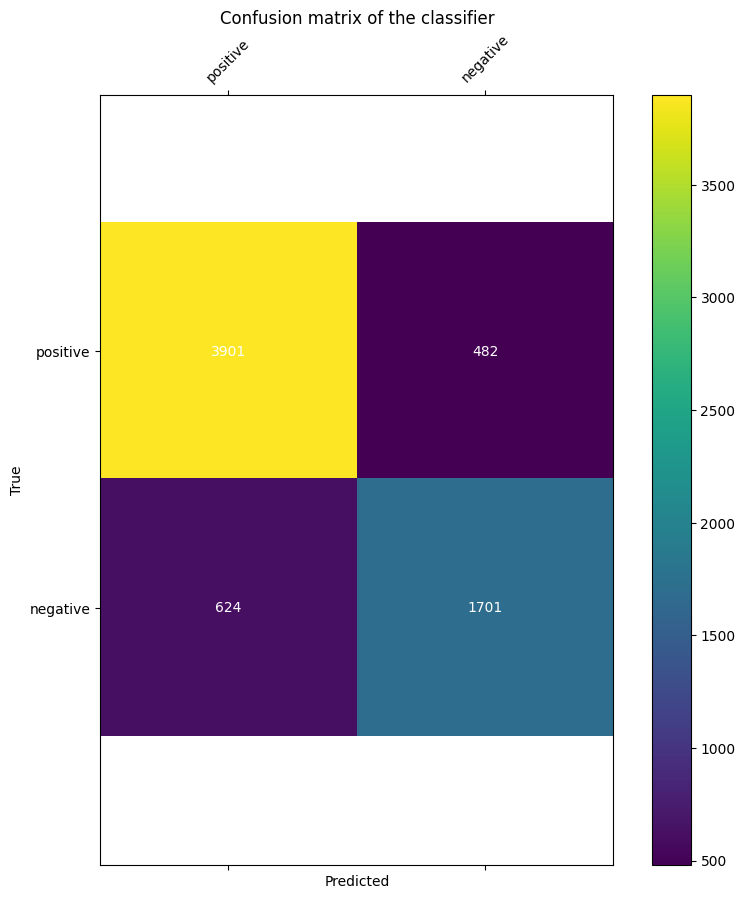

In [13]:
# Plotting confusion matrix
clf = train_classifier(train_data) # training classifier
preds = predict_labels([t[0] for t in test_data], clf) # making prediction on test set
y_true = [t[1] for t in test_data]
confusion_matrix_heatmap(y_true, preds, ["positive", "negative"])

In [15]:
for i, a in enumerate(zip(y_true, preds)):
    true_val, pred = a
    if true_val != pred:
        output_str = f"""
        {20*'='} ITEM #{i} {20*'='}
        
        Prediction: {pred}
        True Value: {true_val}

        Error Type: {'False Negative' if true_val == 'positive' else 'False Positive'}


        Raw Text: {' '.join(k for k in test_data[i][0])}
        {50*'='}
        """
        print(output_str)
        # with open("error-analysis.txt", "a") as f:
        #     f.write(output_str)


        ==================== ITEM #9 ====================
        
        Prediction: negative
        True Value: positive

        Error Type: False Negative


        Raw Text: @the585PRO lolol my brothers neurologist was just in the news recently for medical marijuana epilepsy but lets all do molly!!!!!! </s>
        

        ==================== ITEM #20 ====================
        
        Prediction: negative
        True Value: positive

        Error Type: False Negative


        Raw Text: .@marklevinshow's Friday first hour focused on the SCOTUS unconstitutional redefinition of marriage, and case #KimDavis. Excellent! </s>
        

        ==================== ITEM #22 ====================
        
        Prediction: negative
        True Value: positive

        Error Type: False Negative


        Raw Text: @AKRAM01ARABI Friday's the main day!!!! Knicks vs Heat </s>
        

        ==================== ITEM #32 ====================
        
        Prediction: posi

# Questions 5: Optimising pre-processing and feature extraction (30 marks)

**Note:** it is advisable to implement question 5 in a separate notebook where you further develop the pre-processing and feature extraction functions you implemented above.

In [16]:
# Finally, check the accuracy of your classifier by training on all the traning data
# and testing on the test set
# Will only work once all functions are complete
functions_complete = True  # set to True once you're happy with your methods for cross val
if functions_complete:
    print(test_data[0])   # have a look at the first test data instance
    classifier = train_classifier(train_data)  # train the classifier
    test_true = [t[1] for t in test_data]   # get the ground-truth labels from the data
    test_pred = predict_labels([x[0] for x in test_data], classifier)  # classify the test data to get predicted labels
    final_scores = precision_recall_fscore_support(test_true, test_pred, average='weighted') # evaluate
    print("Done training!")
    print("Precision: %f\nRecall: %f\nF Score:%f" % final_scores[:3])

({'Tomorrow': 1, "we'll": 1, 'release': 1, 'our': 2, '58th': 1, 'episode': 1, 'of': 1, '#HSonAir': 1, 'profiling': 1, 'very': 1, 'own': 1, '@AlissaDosSantos': 1, '!': 1, "We'll": 1, 'talk': 1, 'about': 1, 'storytelling': 1, 'and': 1, 'Beyonce!': 1, '</s>': 1}, 'positive')
Training Classifier...


/Users/bhekimaenetja/.local/share/virtualenvs/small-projects-ai-NRjJWIjk/lib/python3.9/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Done training!
Precision: 0.833367
Recall: 0.835122
F Score:0.833840
